# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
This is a simple linear regression task as it involves just two variables

In [1]:
# import my libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading data
data = "http://bit.ly/w-data"
df = pd.read_csv(data)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<AxesSubplot:>

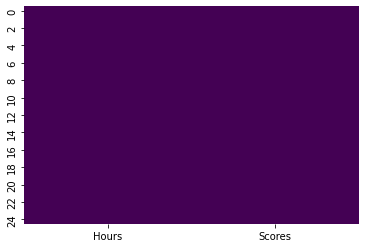

In [6]:
# checking missing values
sns.heatmap(df.isnull(),cbar=False, cmap='viridis')

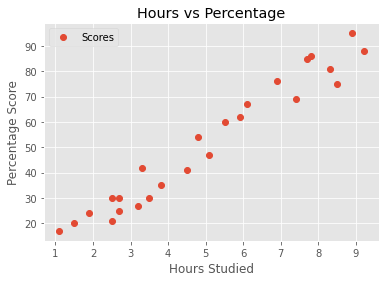

In [7]:
plt.style.use(['ggplot'])
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [8]:
X = df.iloc[:, :-1].values 
y = df.iloc[:, 1].values  

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=3)

In [10]:
# Linear Regression Model
linear_Regressor= LinearRegression()
linear_Regressor.fit(X_train, y_train)
y_predict= linear_Regressor.predict(X_train)
y_tpred= linear_Regressor.predict(X_test)
print("Training complete.")

Training complete.


In [11]:
# Checking the accuracy scores for training and test set
print('MAE:', metrics.mean_absolute_error(y_test, y_tpred))  
print('MSE:', metrics.mean_squared_error(y_test, y_tpred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_tpred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_tpred))
print('Test Score: ' ,("{:.0%}".format(linear_Regressor.score(X_test, y_test))))
print('Training Score: ',("{:.0%}".format(linear_Regressor.score(X_train, y_train))))

MAE: 5.04718991647559
MSE: 27.038891704342618
RMSE: 5.199893432017873
VarScore: 0.9511426911795663
Test Score:  94%
Training Score:  95%


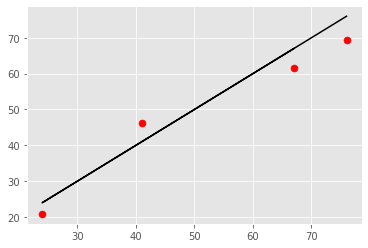

In [12]:
plt.style.use(['ggplot'])
plt.scatter(y_test,y_tpred ,s=50,c='r',label='Predicted') 
plt.plot(y_test,y_test,'black' ,label='Test' )
plt.show()

In [13]:
#Let's predict the score for 9.25 hours
print('Score of student who studied for 9.25 hours a day: ', linear_Regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a day:  [92.2004672]
